# Handwritten Digits Classification

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

## Get Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape) # training set
print('Test data:', X_test.shape, y_test.shape) # validation set

11493376/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


## EDA

In [ ]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

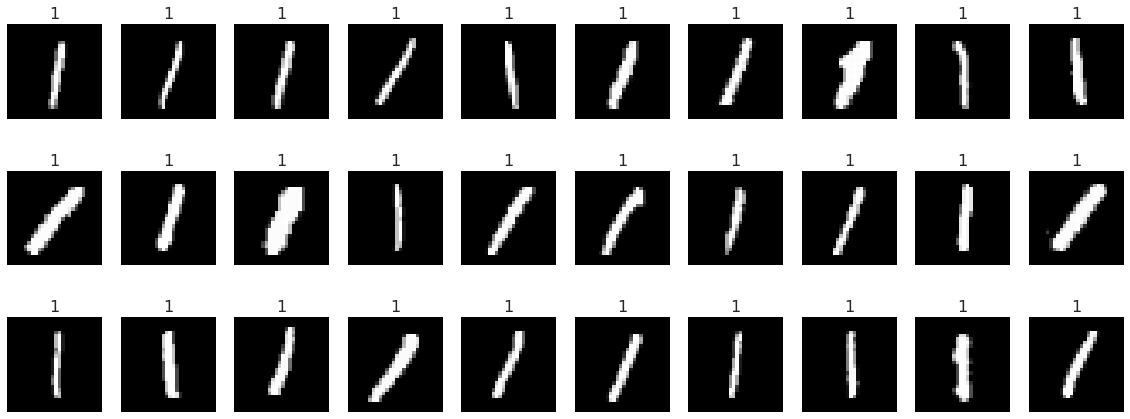

In [ ]:
n_samples = 30
# images, labels = get_samples(n_samples, X_train, y_train)
images, labels = get_digit(1, n_samples, X_train, y_train)
plot_images(images, labels)

**Plot the barplot of number of images of each class (0 to 9)**

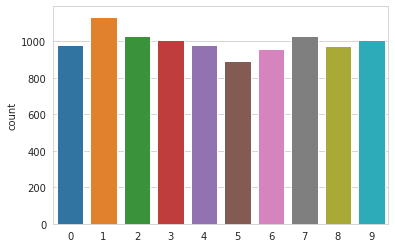

In [ ]:
sns.countplot(y_test)

**Print out the range of pixel values (min, max)**

In [ ]:
print('Pixel value range: ')

Pixel value range: 0 255


## Transform data for training

**Get the first `n_samples` images randomly from training set and test set. Then reshape them into long vectors**

In [ ]:
n_samples = 2000
n_test_samples = 400
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)
print(X_train_flat.shape,X_test_flat.shape)
# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

NameError: ignored

In [ ]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (2000, 784)
Test data (400, 784)


In [ ]:
# Get all the data
# Run it after you finish training with the 2000 samples
X_train_flat = X_train.reshape((-1, 784))
X_test_flat = X_test.reshape((-1, 784))
y_train_flat = y_train
y_test_flat = y_test

print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)
print('Training label', y_train_flat.shape)
print('Test label', y_test_flat.shape)

Training data (60000, 784)
Test data (10000, 784)
Training label (60000,)
Test label (10000,)


## Train models

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Train a SVM model**: Set up the training process and train with the small samples of data first before you take the full training dataset to train.

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train_flat, y_train_flat)
clf.score(X_test_flat, y_test_flat)

0.91

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X_train_flat, y_train_flat)
clf.score(X_test_flat, y_test_flat)

0.94

You can use GridSearch to find the best set of hyperparameters. Take a look at GridSearchCV from Sklearn here (look at the example at the end): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
Cs = [1, 10, 100]
kernels = ['linear', 'rbf']
gammas = ['scale','auto',0.1, 0.01]
model = SVC()
gridsearch_models = GridSearchCV(model, param_grid=dict(kernel=kernels, C=Cs, gamma=gammas), cv=5, n_jobs=-1)
gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# print out the results
pd.DataFrame(gridsearch_models.cv_results_)

In [ ]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score 0.9369999999999999


In [ ]:
best_model = gridsearch_models.best_estimator_
best_model

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# option 2: RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
Cs = [1, 10, 100]
kernels = ['linear', 'rbf']
gammas = ['scale','auto',0.1, 0.01]
model = SVC()
gridsearch_models = RandomizedSearchCV(model, param_grid=dict(kernel=kernels, C=Cs, gamma=gammas), cv=5, n_jobs=-1, n_iter=20) # n_iter is number of random samples

## Evaluation

**Get the predictions on test data**

In [ ]:
best_model.fit(X_train_flat, y_train_flat)
predictions = best_model.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.9837


**Plot the confusion matrix in form of a heatmap**

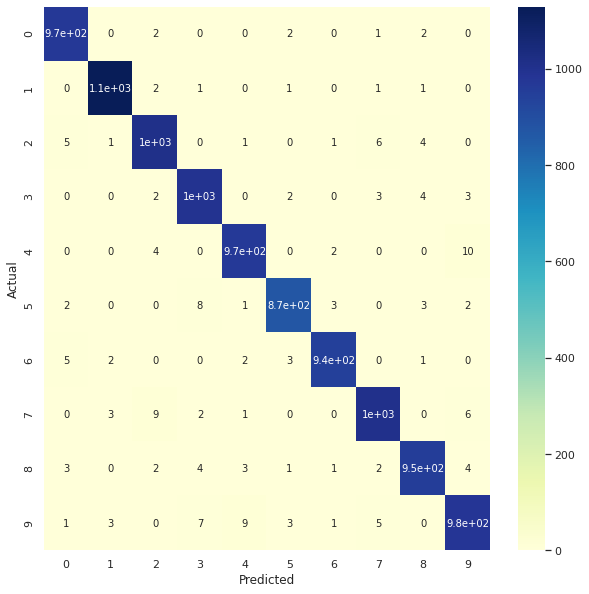

In [ ]:
data = confusion_matrix(y_test_flat, predictions)
df_cm = pd.DataFrame(data, columns=np.unique([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 
                     index = np.unique([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 10})

# plt.figure(figsize=(10,10))
# use sns.heatmap and sklearn's confusion_matrix

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_flat, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Plot the samples that the model predicts incorrectly**

In [ ]:
result = pd.DataFrame(y_test_flat, columns=['Labels'])
result1 = pd.DataFrame(predictions, columns=['Predictions'])
total = pd.concat((result, result1), axis=1)
index = total[total['Labels'] != total['Predictions']].sample(20).index
img = X_test[index, :, :]
predict=result1.loc[index].values   

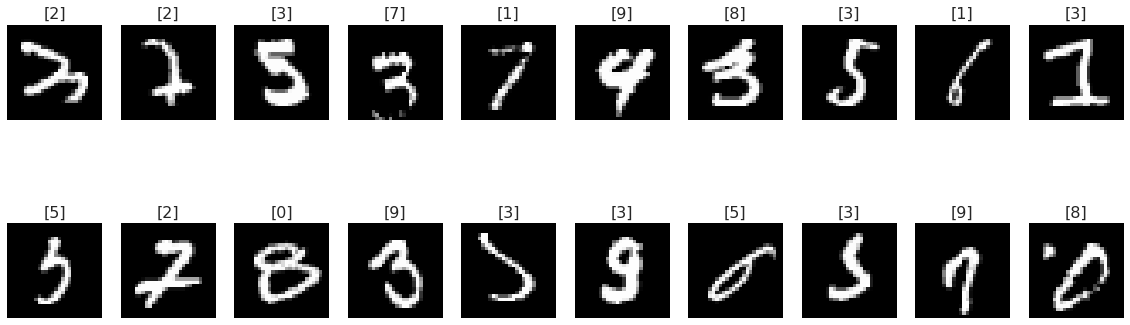

In [ ]:
plot_images(img, predict)

## Save model

In [ ]:
import pickle

pickle.dump(clf, open('svm_mnist.pkl', 'wb'))

**Re-load model for testing**

In [ ]:
with open('svm_mnist.pkl', 'rb') as model:
    reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.78
